<a href="https://colab.research.google.com/github/lloydf96/IE529Project/blob/main/Sparse_K_Means_with_dimensionality_reduction_for_large_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X = data['data']
import numpy as np
import pandas as pd
import sys

In [ ]:
def distance(p1, p2):
    return np.sum((p1 - p2)**2)

def initialize(data, k):
    '''
    initialized the centroids for K-means++
    inputs:
        data - numpy array of data points having shape (200, 2)
        k - number of clusters
    '''
    ## initialize the centroids list and add
    ## a randomly selected data point to the list
    centroids = []
    centroids.append(data[np.random.randint(
            data.shape[0]), :])


    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):

        ## initialize a list to store distances of data
        ## points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize

            ## compute distance of 'point' from each of the previously
            ## selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)

        ## select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []

    return np.vstack(centroids)

def get_centroid_index(x):

  def distance_for_fixed_x(centroid):

    return np.sum((centroid - x)**2)

  distance_vector = np.apply_along_axis(distance_for_fixed_x,axis = 1,arr = centroids)

  return np.argmin(distance_vector)

def WCSS(X,centroids,centroid_indices):
  distance = 0
  for cluster_id in range(no_of_centroids):

    centroid = centroids[cluster_id,:]

    def distance_for_fixed_centroid(x):
      return np.sum((x - centroid)**2)

    point_indices, = np.where(centroid_indices == cluster_id)
    points = np.take(X, point_indices, axis=0)
    # print(points.shape)
    # print(centroid.shape)
    distance += np.sum(np.apply_along_axis(distance_for_fixed_centroid,axis = 1,arr = points))

  return distance
# call the initialize function to get the centroids



In [ ]:
iterations = 100
no_of_centroids = 4
tol = 0.001
s = 2
centroids = initialize(X, k = no_of_centroids)
centroid_indices = np.apply_along_axis(get_centroid_index,axis = 1,arr = X)

number_of_features = X.shape[1]
loss = WCSS(X,centroids,centroid_indices)

for i in range(iterations):
  new_centroids = []
  points_in_centroid = []
  old_loss = loss.copy()

  for cluster_id in range(no_of_centroids):
    #get points from centroid indices
    point_indices, = np.where(centroid_indices == cluster_id)
    points = np.take(X, point_indices, axis=0)
    points_in_centroid.append(points.shape[0])
    #get centroid location and append
    new_centroids.append(np.mean(points,axis = 0))

  #get new centroids in numpy array format
  new_centroids = np.vstack(new_centroids)
  points_in_centroid = np.array(points_in_centroid)


  #calculate feature importance
  dl = np.sum(new_centroids**2,axis = 0)/points_in_centroid
  print("dl")
  print(dl)
  dl_argsort = np.argsort(-1*dl)
  print("dl_argsort")
  print(dl_argsort)

  new_centroids_post_ranking = new_centroids.copy()
  dl_id = 0

  for dl_loc in dl_argsort:
    #dl_loc location of the dl_id largest value in dl array
    if dl_id < s:
      continue

    new_centroids_post_ranking[:,dl_loc] = np.zeros((new_centroids_post_ranking.shape[0],))

    dl_id+=1

  print("new_centroids")
  print(new_centroids_post_ranking)

  centroids = new_centroids_post_ranking
  centroid_indices = np.apply_along_axis(get_centroid_index,axis = 1,arr = X)
  print("centroid_indices")
  print(loss)
  loss = WCSS(X,centroids,centroid_indices)
  print(loss)
  if np.abs(loss - old_loss)<= tol:
    print('Loss Stabilised at %d iterations'%(i))
    break



dl
[2.02272091 0.7195638  6.0897028  0.61441305]
dl_argsort
[2 0 1 3]
new_centroids
[[6.22876712 2.90821918 4.89178082 1.70410959]
 [5.006      3.428      1.462      0.246     ]
 [7.42307692 3.13076923 6.26923077 2.06923077]
 [5.35714286 2.44285714 3.71428571 1.16428571]]
centroid_indices
152.92000000000002
63.4132714817944
dl
[2.60417577 0.73221349 3.92631405 0.37483258]
dl_argsort
[2 0 1 3]
new_centroids
[[6.26607143 2.90714286 4.92142857 1.71964286]
 [5.006      3.428      1.462      0.246     ]
 [7.15       3.12       6.09       2.135     ]
 [5.5125     2.58333333 3.88333333 1.19166667]]
centroid_indices
63.4132714817944
57.9293386904762
dl
[2.96891434 0.73619446 3.4022651  0.32486376]
dl_argsort
[2 0 1 3]
new_centroids
[[6.29183673 2.8877551  4.92653061 1.7122449 ]
 [5.006      3.428      1.462      0.246     ]
 [7.08695652 3.12608696 6.01304348 2.14347826]
 [5.53214286 2.63571429 3.96071429 1.22857143]]
centroid_indices
57.9293386904762
57.35088021295475
dl
[2.96891434 0.73619446

In [ ]:
def plot_data(X):
    plt.scatter(
    X[:, 0], X[:, 1],
    c='white', marker='o',
    edgecolor='black', s=50
    )
    plt.show()

def plot_clusters(X,centroids,cluster):
    sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
    sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.show()

def plot_loss(loss_list):
    epochs = [i for i in range(len(loss_list))]
    plt.plot(epochs,loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

In [ ]:
iterations = 100
no_of_centroids = 4
tol = 0.001
s = 1

centroids = initialize(X, k = no_of_centroids)
centroid_indices = np.apply_along_axis(get_centroid_index,axis = 1,arr = X)

number_of_features = X.shape[1]
loss = WCSS(X,centroids,centroid_indices)

for i in range(iterations):
  new_centroids = []
  points_in_centroid = []
  old_loss = loss.copy()

  for cluster_id in range(no_of_centroids):
    #get points from centroid indices
    point_indices, = np.where(centroid_indices == cluster_id)
    points = np.take(X, point_indices, axis=0)
    points_in_centroid.append(points.shape[0])
    #get centroid location and append
    new_centroids.append(np.mean(points,axis = 0))

  #get new centroids in numpy array format
  new_centroids = np.vstack(new_centroids)
  points_in_centroid = np.array(points_in_centroid)

  #calculate feature importance
  dl = np.sum(new_centroids**2*points_in_centroid[:,np.newaxis],axis = 0)
  dl_argsort = np.argsort(-1*dl)

  new_centroids_post_ranking = new_centroids.copy()
  dl_id = 0

  for dl_loc in dl_argsort:
    #dl_loc location of the dl_id largest value in dl array
    if dl_id < s:
      dl_id+=1
      continue

    new_centroids_post_ranking[:,dl_loc] = np.zeros((new_centroids_post_ranking.shape[0],))
    dl_id+=1


  print("new_centroids")
  print(new_centroids_post_ranking)
  centroids_old = centroids.copy()
  centroids = new_centroids_post_ranking
  centroid_indices = np.apply_along_axis(get_centroid_index,axis = 1,arr = X)
  centroids = centroids_old.copy()

  loss = WCSS(X,centroids,centroid_indices)

  if np.abs(loss - old_loss)<= tol:
    print('Loss Stabilised at %d iterations'%(i))
    break



new_centroids
[[4.73333333 0.         0.         0.        ]
 [6.99642857 0.         0.         0.        ]
 [5.97638889 0.         0.         0.        ]
 [5.25769231 0.         0.         0.        ]]
new_centroids
[[4.69090909 0.         0.         0.        ]
 [6.97142857 0.         0.         0.        ]
 [6.056      0.         0.         0.        ]
 [5.26744186 0.         0.         0.        ]]
new_centroids
[[4.69090909 0.         0.         0.        ]
 [7.05       0.         0.         0.        ]
 [6.09636364 0.         0.         0.        ]
 [5.26744186 0.         0.         0.        ]]
Loss Stabilised at 2 iterations


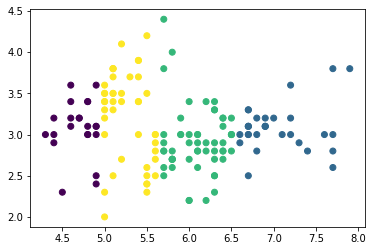

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c = centroid_indices)
plt.show()
